In [16]:
import pandas as pd
import numpy as np
from dateutil.parser import parse

# Load the CSV files
nb_df = pd.read_csv('../data/nb.csv')
drivers_location_df = pd.read_csv('../data/driver_locations_during_request.csv')


In [36]:
# Display the first 5 rows of the DataFrame
print(drivers_location_df.head())

   id  order_id  driver_id driver_action       lat       lng  created_at  \
0   1    392001     243828      accepted  6.602207  3.270465         NaN   
1   2    392001     243588      rejected  6.592097  3.287445         NaN   
2   3    392001     243830      rejected  6.596133  3.281784         NaN   
3   4    392001     243539      rejected  6.596142  3.280526         NaN   
4   5    392001     171653      rejected  6.609232  3.288800         NaN   

   updated_at  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  


In [6]:
# Display the first 5 rows of the DataFrame
print(nb_df.head())

   Trip ID                         Trip Origin  \
0   391996  6.508813001668548,3.37740316890347   
1   391997                 6.4316714,3.4555375   
2   391998         6.631679399999999,3.3388976   
3   391999         6.572757200000001,3.3677082   
4   392001                 6.6010417,3.2766339   

                  Trip Destination      Trip Start Time        Trip End Time  
0      6.650969799999999,3.3450307  2021-07-01 07:28:04  2021-07-01 07:29:37  
1  6.4280814653326,3.4721885847586  2021-07-01 06:38:04  2021-07-01 07:07:28  
2      6.508324099999999,3.3590397  2021-07-01 06:21:02  2021-07-01 07:02:23  
3      6.584881099999999,3.3614073  2021-07-01 07:16:07  2021-07-01 07:29:42  
4              6.4501069,3.3916154  2021-07-01 09:30:59  2021-07-01 09:34:36  


In [58]:
def is_weekday(csv_file):
  

    # Fill missing values in 'Trip Start Time' column with a default value
    nb_df['Trip Start Time'].fillna('1970-01-01 00:00:00', inplace=True)

    # Convert the 'Trip Start Time' column to datetime format
    nb_df['Trip Start Time'] = pd.to_datetime(nb_df['Trip Start Time'])

    # Extract the date part from the 'Trip_start' column
    nb_df['Trip_start_date'] = nb_df['Trip Start Time'].dt.date

    weekday_weekend_list = []
    for date in nb_df['Trip_start_date']:
        day = date.weekday()
        if day < 5:  # 0 = Monday, 1 = Tuesday, 2 = Wednesday, 3 = Thursday, 4 = Friday
            weekday_weekend_list.append((date, 1))  # weekday
        else:
            weekday_weekend_list.append((date, 0))  # weekend
    return weekday_weekend_list
print(weekday_weekend_list)

[(datetime.date(2021, 7, 1), 1), (datetime.date(2021, 7, 2), 1), (datetime.date(1970, 1, 1), 1), (datetime.date(2021, 7, 4), 0), (datetime.date(2021, 7, 3), 0), (datetime.date(2021, 7, 7), 1), (datetime.date(2021, 7, 6), 1), (datetime.date(2021, 7, 5), 1), (datetime.date(2021, 7, 8), 1), (datetime.date(2021, 7, 10), 0), (datetime.date(2021, 7, 9), 1), (datetime.date(2021, 7, 13), 1), (datetime.date(2021, 7, 22), 1), (datetime.date(2021, 8, 4), 1), (datetime.date(2021, 7, 28), 1), (datetime.date(2021, 7, 11), 0), (datetime.date(2021, 7, 27), 1), (datetime.date(2021, 7, 12), 1), (datetime.date(2021, 8, 11), 1), (datetime.date(2021, 8, 7), 0), (datetime.date(2021, 7, 14), 1), (datetime.date(2021, 8, 21), 0), (datetime.date(2021, 7, 15), 1), (datetime.date(2021, 8, 25), 1), (datetime.date(2021, 7, 24), 0), (datetime.date(2021, 8, 2), 1), (datetime.date(2021, 7, 17), 0), (datetime.date(2021, 8, 16), 1), (datetime.date(2021, 8, 13), 1), (datetime.date(2021, 7, 19), 1), (datetime.date(2021, 8

In [64]:
import matplotlib.pyplot as plt
def plot_weekday_weekend(weekday_weekend_list):
    ones = sum([value for date, value in weekday_weekend_list])
    zeros = len(weekday_weekend_list) - ones

    plt.bar(['1', '0'], [ones, zeros])

    plt.xlabel('is weekday')
    plt.ylabel('Count')
    plt.title('Count of Weekdays and Weekends')
    plt.show()

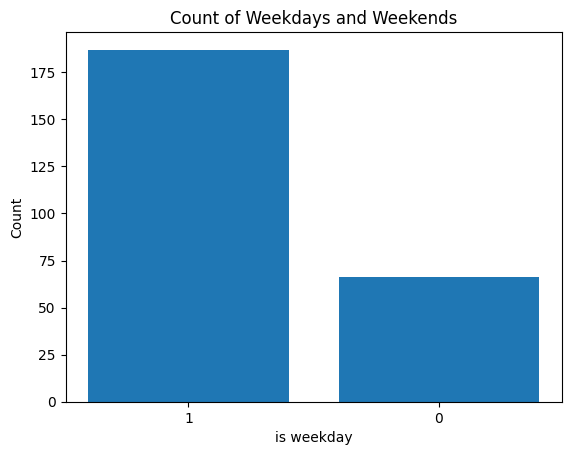

In [65]:
plot_weekday_weekend(weekday_weekend_list)

In [ ]:
# to know unique dates

import pandas as pd
import numpy as np
from dateutil.parser import parse



def get_unique_dates(csv_file):
    # Read the CSV file
    nb_df = pd.read_csv(csv_file)

    # Fill missing values in 'Trip Start Time' column with a default value
    nb_df['Trip Start Time'].fillna('1970-01-01 00:00:00', inplace=True)

    # Convert the 'Trip Start Time' column to datetime format
    nb_df['Trip Start Time'] = pd.to_datetime(nb_df['Trip Start Time'])

    # Extract the date part from the 'Trip_start' column
    nb_df['Trip_start_date'] = nb_df['Trip Start Time'].dt.date

    # Get the unique dates from the 'Trip_start_date' column
    unique_dates = nb_df['Trip_start_date'].unique()

    # Get the number of unique dates
    num_unique_dates = len(unique_dates)

    return num_unique_dates

In [25]:
# to get weekday and weekend
import pandas as pd
import datetime

def is_weekday_or_weekend(unique_dates):
    weekday_weekend_list = []
    for date in unique_dates:
        day = date.weekday()
        if day < 5:  # 0 = Monday, 1 = Tuesday, 2 = Wednesday, 3 = Thursday, 4 = Friday
            weekday_weekend_list.append((date, 1))  # weekday
        else:
            weekday_weekend_list.append((date, 0))  # weekend
    return weekday_weekend_list


In [26]:
num_unique_dates = get_unique_dates('../data/nb.csv')
weekday_weekend_list = is_weekday_or_weekend(unique_dates)
print(weekday_weekend_list)

[(datetime.date(2021, 7, 1), 1), (datetime.date(2021, 7, 2), 1), (datetime.date(1970, 1, 1), 1), (datetime.date(2021, 7, 4), 0), (datetime.date(2021, 7, 3), 0), (datetime.date(2021, 7, 7), 1), (datetime.date(2021, 7, 6), 1), (datetime.date(2021, 7, 5), 1), (datetime.date(2021, 7, 8), 1), (datetime.date(2021, 7, 10), 0), (datetime.date(2021, 7, 9), 1), (datetime.date(2021, 7, 13), 1), (datetime.date(2021, 7, 22), 1), (datetime.date(2021, 8, 4), 1), (datetime.date(2021, 7, 28), 1), (datetime.date(2021, 7, 11), 0), (datetime.date(2021, 7, 27), 1), (datetime.date(2021, 7, 12), 1), (datetime.date(2021, 8, 11), 1), (datetime.date(2021, 8, 7), 0), (datetime.date(2021, 7, 14), 1), (datetime.date(2021, 8, 21), 0), (datetime.date(2021, 7, 15), 1), (datetime.date(2021, 8, 25), 1), (datetime.date(2021, 7, 24), 0), (datetime.date(2021, 8, 2), 1), (datetime.date(2021, 7, 17), 0), (datetime.date(2021, 8, 16), 1), (datetime.date(2021, 8, 13), 1), (datetime.date(2021, 7, 19), 1), (datetime.date(2021, 8

In [32]:
import matplotlib.pyplot as plt

def plot_weekday_weekend(weekday_weekend_list):
    ones = sum([value for date, value in weekday_weekend_list])
    zeros = len(weekday_weekend_list) - ones

    plt.bar(['1s', '0s'], [ones, zeros])

    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.title('Count of 1s and 0s')
    plt.show()

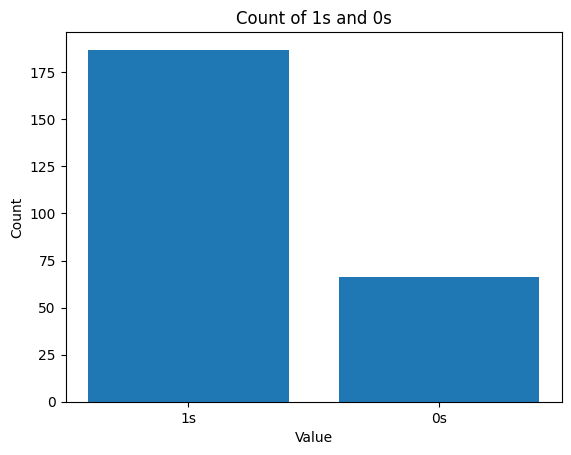

In [33]:
weekday_weekend_list = is_weekday_or_weekend(unique_dates)
plot_weekday_weekend(weekday_weekend_list)

In [41]:
import pandas as pd

def is_holiday(unique_dates):
    holidays = ['2021-07-04', '2021-11-11']  # add your holiday dates here
    holiday_list = []
    for date in unique_dates:
        if str(date) in holidays:
            holiday_list.append(1)
        else:
            holiday_list.append(0)
    return holiday_list

In [42]:
holiday_list = is_holiday(unique_dates)
print(holiday_list)

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [43]:
import matplotlib.pyplot as plt



def plot_holidays(holiday_list):
    ones = sum([value for date, value in holiday_list])
    zeros = len(holiday_list) - ones

    plt.bar(['1s', '0s'], [ones, zeros])

    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.title('Count of 1s and 0s')
    plt.show()

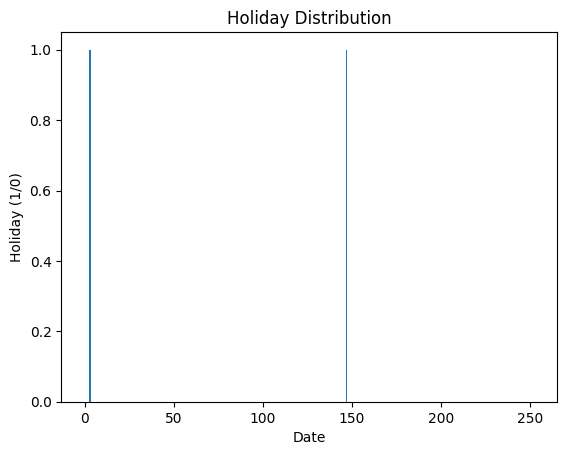

In [44]:
plot_holiday(unique_dates)

In [41]:
# check if there is null values

print(nb_df.isnull().sum())


Trip ID                0
Trip Origin            0
Trip Destination       0
Trip Start Time     1651
Trip End Time          1
dtype: int64


In [ ]:
#Drop rows with any null values
drivers_location_df = nb_df.dropna()

In [43]:
print(drivers_location_df.isnull().sum())
# Drop rows with any null values
drivers_location_df = drivers_location_df.dropna()


id                     0
order_id               0
driver_id              0
driver_action          0
lat                    0
lng                    0
created_at       1557740
updated_at       1557740
dtype: int64


In [54]:
import datetime

def is_weekday(date_str):
    date = datetime.datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')
    return date.weekday() < 5



# Fill missing values in 'Trip Start Time' column with a default value
nb_df['Trip Start Time'].fillna('1970-01-01 00:00:00', inplace=True)

# Convert the 'Trip Start Time' column to datetime format
nb_df['Trip Start Time'] = pd.to_datetime(nb_df['Trip Start Time'])

# Extract the date part from the 'Trip_start' column
nb_df['Trip_start_date'] = nb_df['Trip Start Time'].dt.date

# Create a new column to store the weekday/weekend information
nb_df['Weekday/Weekend'] = nb_df['Trip_start_date'].apply(is_weekday)

# Print the results
print(nb_df['Weekday/Weekend'])

TypeError: strptime() argument 1 must be str, not datetime.date

In [3]:
import datashader as ds, pandas as pd, colorcet
df  = pd.read_csv('../data/merged_result.csv')
cvs = ds.Canvas(plot_width=850, plot_height=500)
agg = cvs.points(df, 'lng', 'lat')
img = ds.tf.shade(agg, cmap=colorcet.fire, how='log')

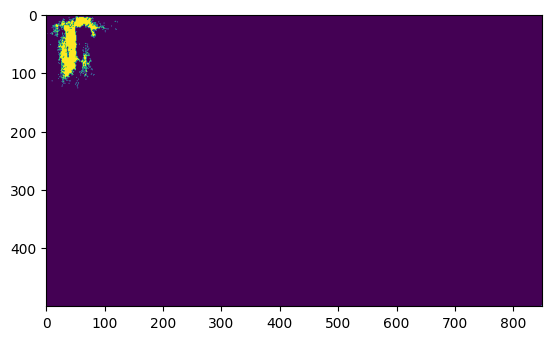

In [4]:
import matplotlib.pyplot as plt
plt.imshow(img.data)
plt.show()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
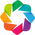

In [5]:
import holoviews as hv
hv.extension('bokeh')

In [6]:
hv.Image(img)

:Image   [lng,lat]   (z)